<a href="https://colab.research.google.com/github/SurajLahariya/DS_learning/blob/main/Assignment_17_(_Support_Vector_Machines_)_Forest_fires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
sns.set_style('darkgrid')

In [2]:
url = 'https://raw.githubusercontent.com/SurajLahariya/DS_learning/main/forestfires.csv'

In [3]:
df =pd.read_csv(url)

In [4]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.describe(include=['O'])

,month,day,size_category
count,517,517,517
unique,12,7,2
top,aug,sun,small
freq,184,95,378


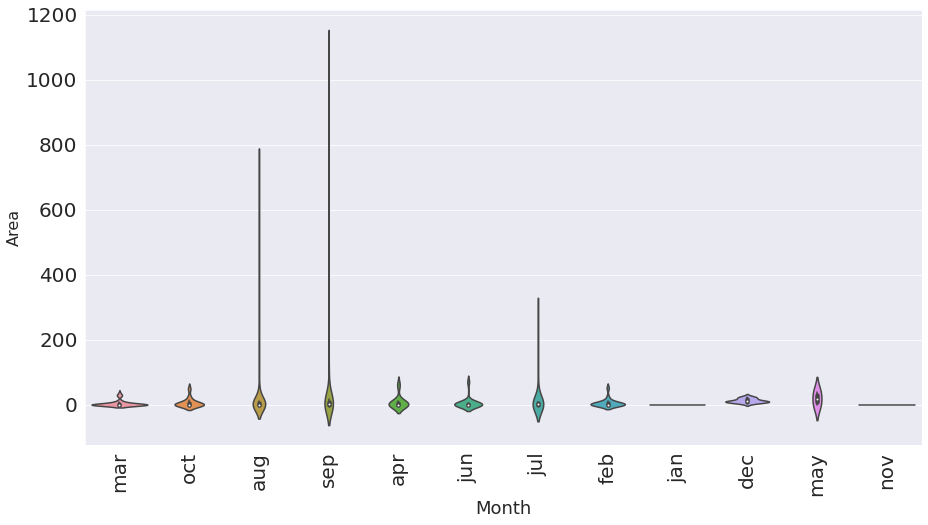

In [14]:
plt.figure(figsize=(15,8))
sns.violinplot(x = 'month', y= "area",data = df)
plt.xticks(rotation = 90, size = 20)
plt.yticks(size = 20)
plt.xlabel('Month',fontsize=18)
plt.ylabel('Area', fontsize=16)

plt.show()

In [13]:
df['area_km'] = df['area'] / 100

df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,area_km
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,small,0.0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,1,0,small,0.0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,1,0,small,0.0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,small,0.0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,1,0,0,0,0,small,0.0


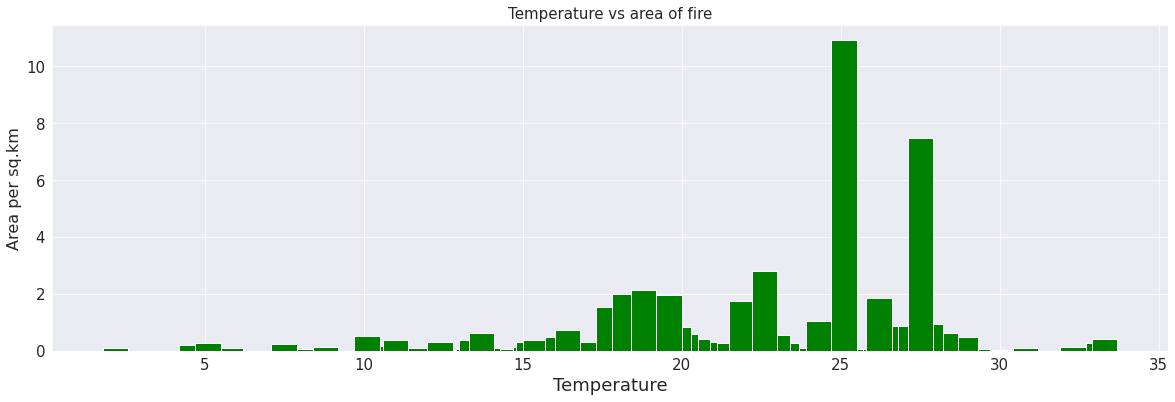

In [15]:
highest_fire_area = df.sort_values(by="area_km", ascending=True)

plt.figure(figsize=(20, 6))

plt.title("Temperature vs area of fire" , fontsize=15)
plt.bar(highest_fire_area['temp'], highest_fire_area['area_km'], color = "green")

plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel('Temperature',fontsize=18)
plt.ylabel('Area per sq.km', fontsize=16)
plt.show()

In [20]:
cat_col = [col for col in df.columns if df[col].dtype =='object']
cat_col

['month', 'day', 'size_category']

In [21]:
num_col = [col for col in df.columns if df[col].dtype !='object']
num_col

['FFMC',
 'DMC',
 'DC',
 'ISI',
 'temp',
 'RH',
 'wind',
 'rain',
 'area',
 'dayfri',
 'daymon',
 'daysat',
 'daysun',
 'daythu',
 'daytue',
 'daywed',
 'monthapr',
 'monthaug',
 'monthdec',
 'monthfeb',
 'monthjan',
 'monthjul',
 'monthjun',
 'monthmar',
 'monthmay',
 'monthnov',
 'monthoct',
 'monthsep',
 'area_km']

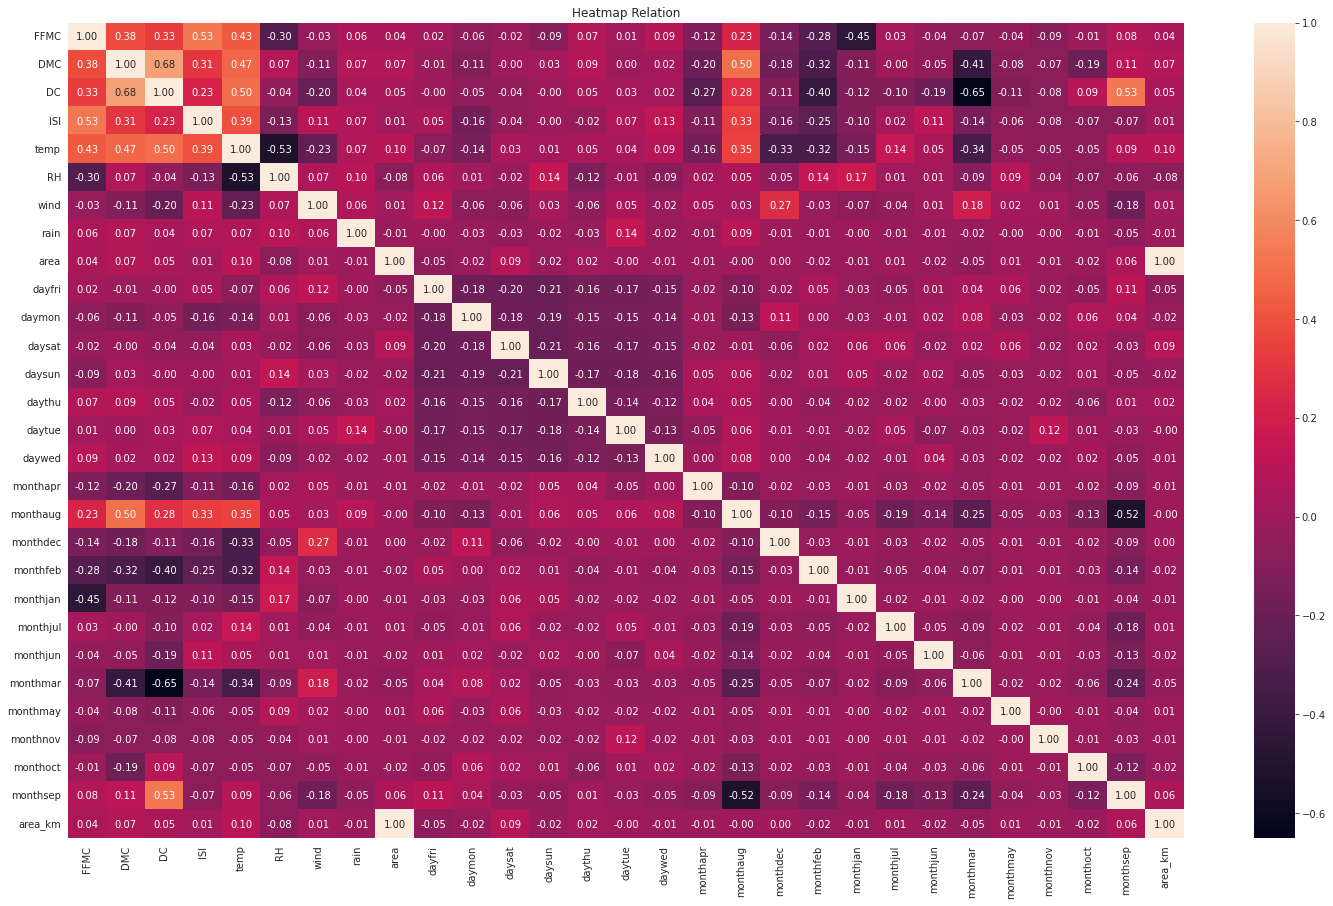

In [27]:
#heatmap
plt.figure(figsize=(25, 15))

plt.title("Heatmap Relation")

sns.heatmap(df[num_col].corr(), annot=True, fmt='.2f');

In [37]:
#Dropping the month and day columns
#df.drop(["month","day"],axis=1,inplace =True)


In [38]:
X = df.iloc[:,0:28]
y = df.iloc[:,28]

In [32]:
y

0      small
1      small
2      small
3      small
4      small
       ...  
512    large
513    large
514    large
515    small
516    small
Name: size_category, Length: 517, dtype: object

In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, stratify = y)

In [43]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [42]:
# kernel = linear
model_linear = SVC(kernel = "linear")
model_linear.fit(X_train,y_train)
pred_test = model_linear.predict(X_test)

In [44]:
accuracy_score(y_test, pred_test)

0.9846153846153847

In [46]:
# kernel = rbf
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(X_train,y_train)
pred_test_rbf = model_rbf.predict(X_test)
np.mean(pred_test_rbf==y_test)

0.7769230769230769

In [47]:
# Kernel = poly
model_poly = SVC(kernel = "poly")
model_poly.fit(X_train,y_train)
pred_test_poly = model_poly.predict(X_test)

np.mean(pred_test_poly==y_test)

0.7923076923076923

In [48]:
#'sigmoid'
model_sig = SVC(kernel = "sigmoid")
model_sig.fit(X_train,y_train)
pred_test_sig = model_sig.predict(X_test)

np.mean(pred_test_sig==y_test)

0.6692307692307692

###Parameters selection

In [49]:
SVMC = SVC(random_state=42)

svc_param_grid = {'kernel': ['rbf', 'sigmoid', 'poly','linear'], 
                  'gamma': [1, 0.1, 0.01, 0.001],
                  'C': [1000, 100, 10, 1],
                  'tol':[0.001,0.0008,0.0009,0.0011]}

gs = GridSearchCV(SVMC, param_grid = svc_param_grid, cv = 5, scoring = "accuracy", n_jobs = 6, verbose = 1)

gs.fit(X_train,y_train)

svm_best = gs.best_estimator_

gs.best_score_

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


0.987079587079587

In [50]:
svm_best

SVC(C=1000, gamma=1, kernel='linear', random_state=42)

In [52]:
Final_model = svm_best
predict_results = Final_model.predict(X_test)

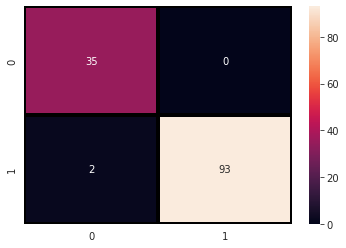

In [53]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, predict_results),annot=True,fmt = "d",linecolor="k",linewidths=3)